# **Kaggle HW5: [Chris Lu]**

**Remember to write your team name above, which MUST match your team name on Kaggle!!** Assignments without a team name will receive a 0/40 on the "accuracy on test data" component of this assignment's grade.

### **Load the Data**

In [2]:
# This cell is necessary only if you are running on Google Colab. It downloads the files to your
# Colab instance so you don't have to upload them here.

import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
      f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_train.csv',
          'edx_train.csv')
save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_test.csv',
          'edx_test.csv')

### **Sample Code: Random Classifier**

**NOTE**: This classifier **DOES NOT** count as one of the 2 required for this assignment! It is merely here to illstrate how to submit your predictions.

See the Kaggle assignment (Data tab) for a description of each column in the dataset. You are creating a classifier to predict whether or not a student will get certified, stored in the `"certified"` column.

In [3]:
import pandas as pd
from sklearn.dummy import DummyClassifier

target = "certified" # target column

# This classifier returns labels sampled uniformly at random
df_train = pd.read_csv('edx_train.csv')
dummy_model = DummyClassifier(strategy="uniform")
dummy_model.fit(df_train.drop(target, axis=1), df_train[target])

DummyClassifier(strategy='uniform')

The code below generates predictions on the test set, and outputs the predictions into a CSV file.

In [4]:
# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')
predictions = dummy_model.predict(df_test)

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

# See below for instructions on how to upload submission.csv to Kaggle,
# in order to evaluate your model and get points.

### **[5 Pts] Model Comparison**

**Instructions**: Run at least 2 different classification models. The classification models we have learned in class are: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [Neural Networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html). For each model, try at least 2 different hyperparameter settings.

Then, make one or more visualizations that let you compare the models you trained. Sample visualizations you can make include confusion matrices, or graphs of train and validation accuracy/error. See past section and homework code for how to make these visualizations.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
target = "certified"

df_train = pd.read_csv('edx_train.csv')
df_test = pd.read_csv('edx_test.csv')

label_encoders = {}

for column in df_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column].astype(str))
    label_encoders[column] = le

for column in df_test.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_test[column] = le.fit_transform(df_test[column].astype(str))
    label_encoders[column] = le

df_train = df_train.apply(pd.to_numeric, errors='coerce')
df_test = df_test.apply(pd.to_numeric, errors='coerce')

X_train = df_train.drop(target, axis=1)
y_train = df_train[target]
X_test = df_test

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

### Logistic Regression

In [6]:
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train)
X_test_log = scaler.fit_transform(X_test)

logreg_hyperparameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

log_model = LogisticRegression(max_iter=1000)
logreg_search = GridSearchCV(log_model, logreg_hyperparameters, cv=5)
logreg_search.fit(X_train, y_train)

/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']})

### K-NN

In [7]:
knn_hyperparameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    "p": [1, 2]
}

knn_model = KNeighborsClassifier()
knn_search = GridSearchCV(knn_model, knn_hyperparameters, scoring="accuracy", cv=5)
knn_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

### Decision Tree Classification

In [8]:
dt_hyperparameters = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier()
dt_search = GridSearchCV(dt_model, dt_hyperparameters, cv=5)
dt_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

### Random Forests

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_hyperparameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf_model = RandomForestClassifier(random_state=42)
rf_search = GridSearchCV(rf_model, rf_hyperparameters, cv=5)
rf_search.fit(X_train, y_train)

/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/chris/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/Us

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
ada_hyperparameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0, 1.5]
}
ada_model = AdaBoostClassifier(random_state=42)
ada_search = GridSearchCV(ada_model, ada_hyperparameters, scoring='accuracy', cv=5)
ada_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.5, 1.0, 1.5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

### Neural Networks

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
nn_hyperparameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # one or two hidden layers
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01]
}
nn_model = MLPClassifier(max_iter=1000, random_state=42, early_stopping=True)
nn_search = GridSearchCV(nn_model, nn_hyperparameters, scoring='accuracy', cv=3)
nn_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=MLPClassifier(early_stopping=True, max_iter=1000,
                                     random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate_init': [0.001, 0.01],
                         'solver': ['adam']},
             scoring='accuracy')

Logistic Regression - Training Accuracy: 0.9465631422699247
Logistic Regression - Validation Accuracy: 0.9514729352307489
KNN - Training Accuracy: 0.9580954555834665
KNN - Validation Accuracy: 0.9255537605386616
Decision Tree - Training Accuracy: 0.9846997031285681
Decision Tree - Validation Accuracy: 0.9679145511110416
Random Forest - Training Accuracy: 1.0
Random Forest - Validation Accuracy: 0.9751081573738686
AdaBoost - Training Accuracy: 0.9643754281799498
AdaBoost - Validation Accuracy: 0.9646037228563455
Neural Network - Training Accuracy: 0.9523863895866637
Neural Network - Validation Accuracy: 0.9533005298305387


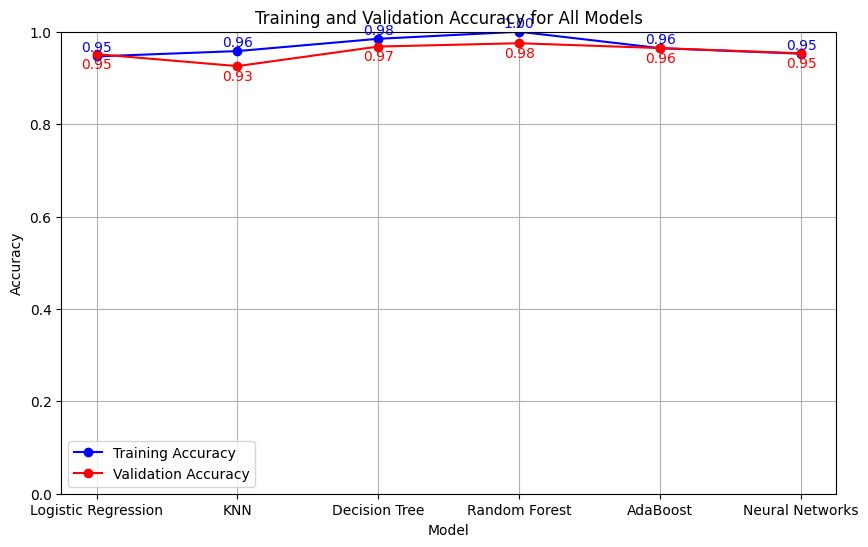

In [26]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Logistic Regression
best_log_model = logreg_search.best_estimator_
log_train_pred = best_log_model.predict(X_train)
log_train_accuracy = accuracy_score(y_train, log_train_pred)
log_val_accuracy = logreg_search.best_score_
print("Logistic Regression - Training Accuracy:", log_train_accuracy)
print("Logistic Regression - Validation Accuracy:", log_val_accuracy)

# K-Nearest Neighbors
best_knn_model = knn_search.best_estimator_
knn_train_pred = best_knn_model.predict(X_train)
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
knn_val_accuracy = knn_search.best_score_
print("KNN - Training Accuracy:", knn_train_accuracy)
print("KNN - Validation Accuracy:", knn_val_accuracy)

# Decision Tree
best_dt_model = dt_search.best_estimator_
dt_train_pred = best_dt_model.predict(X_train)
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
dt_val_accuracy = dt_search.best_score_
print("Decision Tree - Training Accuracy:", dt_train_accuracy)
print("Decision Tree - Validation Accuracy:", dt_val_accuracy)

# Random Forest
best_rf_model = rf_search.best_estimator_
rf_train_pred = best_rf_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_val_accuracy = rf_search.best_score_
print("Random Forest - Training Accuracy:", rf_train_accuracy)
print("Random Forest - Validation Accuracy:", rf_val_accuracy)

# AdaBoost
best_ada_model = ada_search.best_estimator_
ada_train_pred = best_ada_model.predict(X_train)
ada_train_accuracy = accuracy_score(y_train, ada_train_pred)
ada_val_accuracy = ada_search.best_score_
print("AdaBoost - Training Accuracy:", ada_train_accuracy)
print("AdaBoost - Validation Accuracy:", ada_val_accuracy)

# Neural Networks
best_nn_model = nn_search.best_estimator_
nn_train_pred = best_nn_model.predict(X_train)
nn_train_accuracy = accuracy_score(y_train, nn_train_pred)
nn_val_accuracy = nn_search.best_score_
print("Neural Network - Training Accuracy:", nn_train_accuracy)
print("Neural Network - Validation Accuracy:", nn_val_accuracy)

models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Neural Networks']
train_accuracies = [log_train_accuracy, knn_train_accuracy, dt_train_accuracy, rf_train_accuracy, ada_train_accuracy, nn_train_accuracy]
val_accuracies   = [log_val_accuracy, knn_val_accuracy, dt_val_accuracy, rf_val_accuracy, ada_val_accuracy, nn_val_accuracy]

plt.figure(figsize=(10, 6))
plt.plot(models, train_accuracies, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(models, val_accuracies, marker='o', linestyle='-', color='red', label='Validation Accuracy')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy for All Models")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

for i, acc in enumerate(train_accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', color='blue', fontsize=10)
for i, acc in enumerate(val_accuracies):
    plt.text(i, acc - 0.03, f"{acc:.2f}", ha='center', color='red', fontsize=10)

plt.show()

In [27]:
df_test = pd.read_csv('edx_test.csv')
X_test_log = scaler.transform(X_test)
# Logistic Regression
pred_log = best_log_model.predict(X_test_log)
submission_log = df_test[['userid_DI']].copy()
submission_log['certified'] = pred_log
submission_log.to_csv('submission_logistic.csv', index=False)

# k-Nearest Neighbors
pred_knn = best_knn_model.predict(X_test)
submission_knn = df_test[['userid_DI']].copy()
submission_knn['certified'] = pred_knn
submission_knn.to_csv('submission_knn.csv', index=False)

# Decision Tree
pred_dt = best_dt_model.predict(X_test)
submission_dt = df_test[['userid_DI']].copy()
submission_dt['certified'] = pred_dt
submission_dt.to_csv('submission_dt.csv', index=False)

# 4. Random Forest
pred_rf = best_rf_model.predict(X_test)
submission_rf = df_test[['userid_DI']].copy()
submission_rf['certified'] = pred_rf
submission_rf.to_csv('submission_rf.csv', index=False)

# AdaBoost
pred_ada = best_ada_model.predict(X_test)
submission_ada = df_test[['userid_DI']].copy()
submission_ada['certified'] = pred_ada
submission_ada.to_csv('submission_adaboost.csv', index=False)

# Neural Networks
pred_nn = best_nn_model.predict(X_test)
submission_nn = df_test[['userid_DI']].copy()
submission_nn['certified'] = pred_nn
submission_nn.to_csv('submission_nn.csv', index=False)

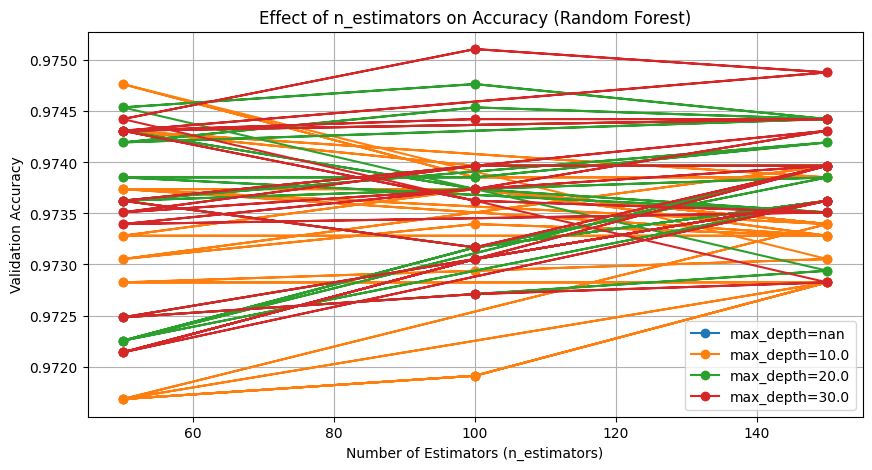

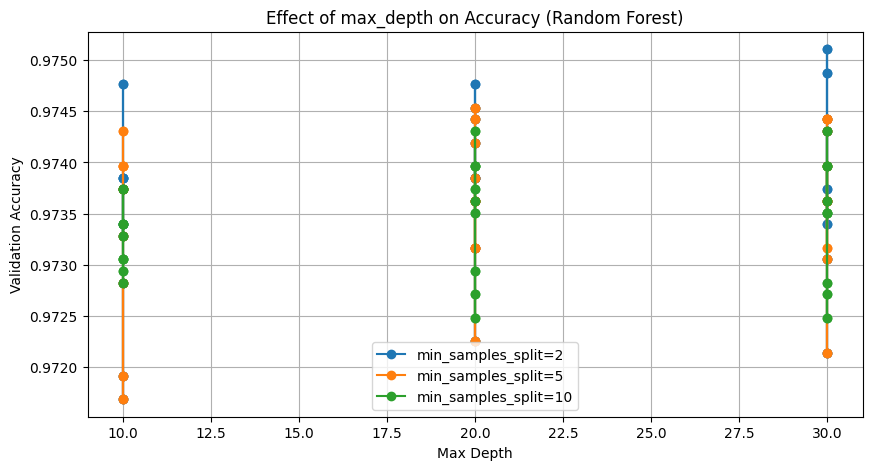

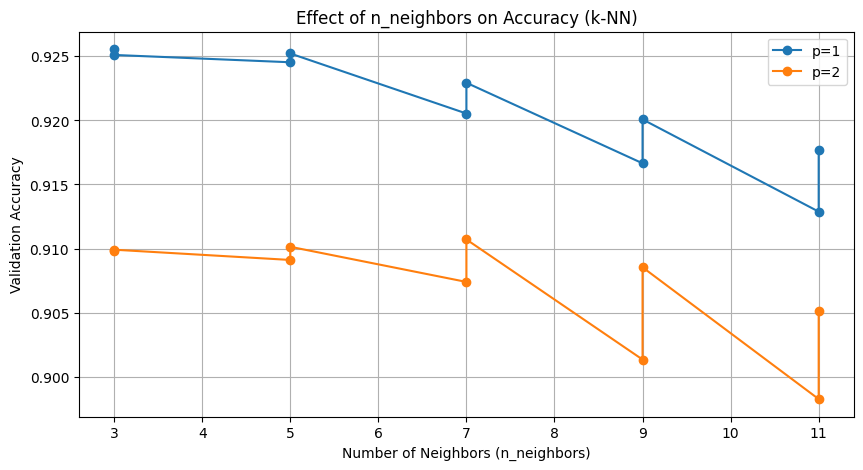

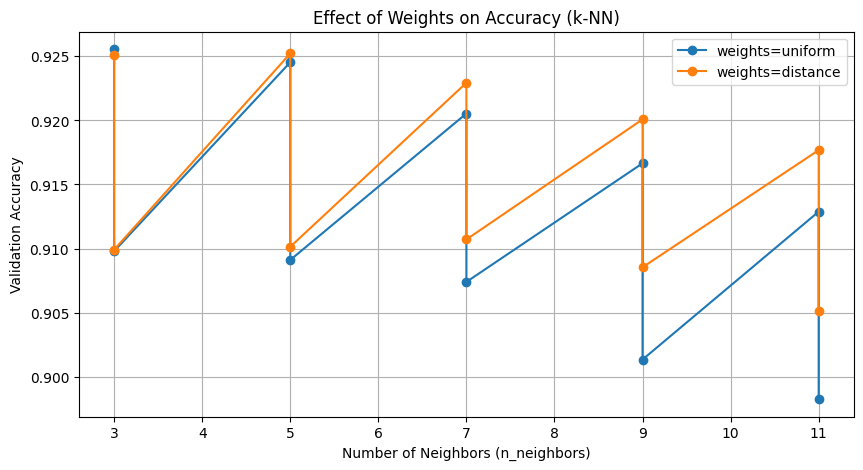

Best Random Forest Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best k-NN Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [28]:
rf_results = rf_search.cv_results_
rf_params = rf_results["params"]
rf_scores = rf_results["mean_test_score"]

rf_df = pd.DataFrame(rf_params)
rf_df["accuracy"] = rf_scores

plt.figure(figsize=(10, 5))
for depth in rf_df["max_depth"].unique():
    subset = rf_df[rf_df["max_depth"] == depth]
    plt.plot(subset["n_estimators"], subset["accuracy"], marker='o', linestyle='-', label=f"max_depth={depth}")

plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Validation Accuracy")
plt.title("Effect of n_estimators on Accuracy (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
for split in rf_df["min_samples_split"].unique():
    subset = rf_df[rf_df["min_samples_split"] == split]
    plt.plot(subset["max_depth"], subset["accuracy"], marker='o', linestyle='-', label=f"min_samples_split={split}")

plt.xlabel("Max Depth")
plt.ylabel("Validation Accuracy")
plt.title("Effect of max_depth on Accuracy (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()

knn_results = knn_search.cv_results_
knn_params = knn_results["params"]
knn_scores = knn_results["mean_test_score"]
knn_df = pd.DataFrame(knn_params)
knn_df["accuracy"] = knn_scores
plt.figure(figsize=(10, 5))
for p in knn_df["p"].unique():
    subset = knn_df[knn_df["p"] == p]
    plt.plot(subset["n_neighbors"], subset["accuracy"], marker='o', linestyle='-', label=f"p={p}")

plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Validation Accuracy")
plt.title("Effect of n_neighbors on Accuracy (k-NN)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
for weight in knn_df["weights"].unique():
    subset = knn_df[knn_df["weights"] == weight]
    plt.plot(subset["n_neighbors"], subset["accuracy"], marker='o', linestyle='-', label=f"weights={weight}")

plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Validation Accuracy")
plt.title("Effect of Weights on Accuracy (k-NN)")
plt.legend()
plt.grid(True)
plt.show()

print("Best Random Forest Parameters:", rf_search.best_params_)
print("Best k-NN Parameters:", knn_search.best_params_)

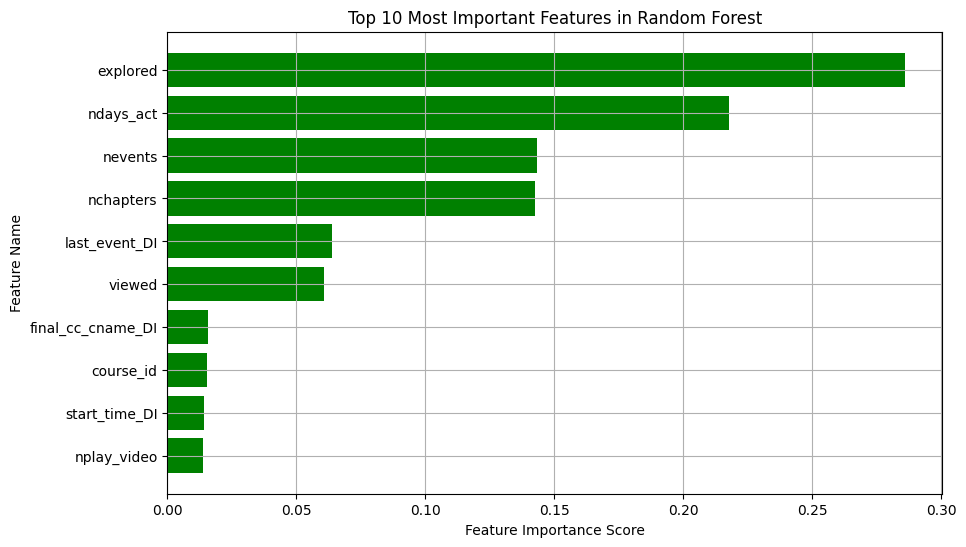

In [ ]:
rf_feature_names = df_train.drop(columns=["certified"]).columns  
rf_feature_importances = best_rf_model.feature_importances_
rf_sorted_idx = np.argsort(rf_feature_importances)[::-1]
rf_sorted_features = np.array(rf_feature_names)[rf_sorted_idx]
rf_sorted_importances = rf_feature_importances[rf_sorted_idx]


plt.figure(figsize=(10, 6))
plt.barh(rf_sorted_features[:10], rf_sorted_importances[:10], color='green')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 10 Most Important Features in Random Forest")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


**Remember to submit your submissions CSV FILE on Kaggle!** 40 pts come from your accuracy on the private test data.

See screenshots below for how to upload submissions to Kaggle (ingore summer and homework number in pictures). This was also covered in your section on Thursday 2/20.

Step 1: See the list of files on Colab

![See Colab Files](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/1_colab_see_files.jpg)

Step 2: Download `submission.csv`

![Download Colab File](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/2_colab_download_file.jpg)

Step 3: Join the Kaggle competition.

![Join the Kaggle Competition](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/3_kaggle_join_competition.jpg)

Step 4: Enusre your team name in Kaggle matches the one at the top of this notebook!

![Check Team Name](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/4_kaggle_team_name.jpg)

Step 5: Upload `submission.csv` to Kaggle

![Upload submission.csv](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/6_kaggle_upload_submission.jpg)



### **Discussion**



#### **[7 Pts] Training the Models**

**Instructions**: Discuss what models you tried, and what you did to improve your initial predictions. Discuss what hyperparameters you tried, and which hyperparameters seemed important for your final model. Finally, discuss what you are inferring from the above visualiation(s).

I tried Logistic Regression, k-Nearest Neighbors, Decision Trees, Random Forests, Adaboost, and Neural Networks. I will discuss about k-Nearest Neighbors and Random Forests. In k-NN I used number of neighbors, weights, and p-norm selection (Manhattan and Euclidean). For Random Forests, I used number of trees, limit of tree depth, minimum number of split a node, minimum number at a leaf node, and number of features considered at each split. After visualizing hyperparameters tuning, I observed that k-NN's most important hyperparameters were number of neighbors and p-norm. Lowering number of neighbors lead to overfitting and p=1 (Manhattan distance) performs better than p=2 (Euclidean). For random forests, max_depth, min_sample_leaf, and max_features were the most impactful, indicating that controlling the tree complexity and feature selection is crucial for model performance. Overall, random forests is more generalizable model while k-NN is more sensitive to hyperparameters choices. Hence, I chose random forest as my final model for test case.

#### **[3 Pts] Feature Selection**

**Instructions**: Discuss what features you used and whether you did some transformations on them. What features seemed important for your final model?

I used Label Encoding for categorical features since tree-based models and k-NN method require numerical inputs. I handled missing value by imputation. For Logistic Regression and Neural Networks, I applied standard scaling to normalize feature values. Based on visualization, we observed that there are 5 important features: explored, ndays_act, nevents, and nchapters. These features all relate to student activity which suggests that the more active students are, the more likely they will complete the course. These features have strong influence on the overall result of students completing and certified.

#### **[5 Pts] Ethical Implications**

**Instructions**: Consider and discuss the ethical implications of using the model you trained. Imagine you were hired to work as a data scientist for an online education platform (exciting, right?). They want to use your model to predict which students they should tailor their course material towards so they can maximize their profits. Their idea is to use the model to help predict which student groups (i.e. from specific countries or certain educational backgrounds) would make them the most money by getting the most participants to complete their paid certificate program. Are there any ethical considerations we should think about before acting on that plan?

When the model is used to prioritize students from specific countries and educational backgrounds, such model can create systemic bias. To avoid such bias, we should ensure the model is designed to promote inclusivity by not excluding certain background. Some students may have low engagement at first due to certain reasons, but could improve later. Then, the model should not limit their chances as well. Since the model uses student activity data, it is sensitive and personal. There is risk of misuse of personal data such as tracking student behavior for profit instead of educational purpose. Instead of using model to maximize profits, educational platform should enhance learning opportunities for all students. 